# Notebook 3: Adding Logic and Processing
This Example code will walk you through the creation of PyroManager Hooks.

These hooks are also called 'callback functions' which are functions passed into functions to be evaluated at different stages of the image acquisition loop.
The stages are as follows:

(1) Pre-Hardware Hook 

(2) Post Hardware Hook

(3) Pre Camera Hook

(4) Post Camera Hook

(5) Image Processing Hook

If a callback is used, the acqusition will cycle over (1~4) repeating for each image acquired. The image hook lives on its own thread.

Each hook function requires the creation of a function with a very particular inputs, unique to each type of callback

A HookSet is a wad of all the hook functions treated as a single object. Each hook is a variable of the HookSet.

Hello World Example:
Below is an example of the creation of a Pre hardware hook that prints hello world after actuating the hardware

In [1]:
import sys,os
sys.path.append('source')

## Example 3.1: The Hello World Hook Function
todo 

/Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/venv/lib/python3.11/site-packages/docstring_inheritance/docstring_inheritors/bases/inheritor.py:329: DocstringInheritanceWarning: File /Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/venv/lib/python3.11/site-packages/pycromanager/acquisitions.py:698: in XYTiledAcquisition.__init__: section Parameters: the docstring for the argument 'tile_overlap' is missing.
  self._warn(
/Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/venv/lib/python3.11/site-packages/docstring_inheritance/docstring_inheritors/bases/inheritor.py:329: DocstringInheritanceWarning: File /Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/venv/lib/python3.11/site-packages/pycromanager/acquisitions.py:698: in XYTiledAcquisition.__init__: section Parameters: the docstr

Aquisition was completed and saved at /Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/data/users/default/acquisition/xySequence_21/
Image has size (6, 512, 512)
Slicing to last two dimensions


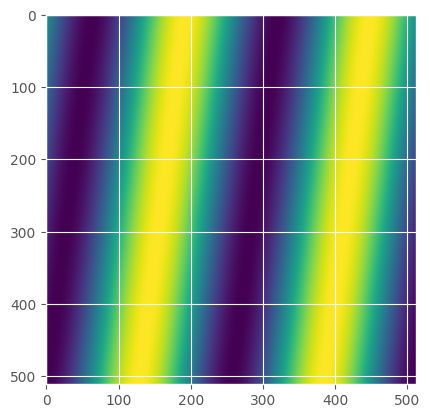

In [2]:
from source.apd import *
from source.hooks import HookSet, Hook
from datetime import datetime

def printInformation(self,event,stack):
    print(f'\n event={event}')
    print(datetime.now())
    #print(f'\ndir(self)={dir(self)}')
    #print(f'\ndir(stack.queue)={(stack.queue)}')

def helloWorldFunctionPrehardware(self,event,stack):
    print('\nhello world from Pre-hardware Hook')
    printInformation(self,event,stack)
    return event

def helloWorldFunctionPostHardware(self,event,stack):
    print('\nhello world from Post-hardware Hook')
    printInformation(self,event,stack)
    return event

hooks=HookSet()
hooks.hookPreHardware=Hook(function=helloWorldFunctionPrehardware)
hooks.hookPostHardware=Hook(function=helloWorldFunctionPostHardware)

apdSystem = APDSystem(configFileName='myConfig.cfg', rootDataFolder='') #local
lib = AcquisitionPluginLibrary()
positions=[[0,0],[1,0],[0,1],[1,1],[1,2],[2,1]] #a list of length 1 which will use the origin [0,0] only
acquisition = lib.xySequence(positions)
#acquisition.hooks=hooks
dataset=apdSystem.acquire(acquisition)

print(f'Aquisition was completed and saved at {dataset.path}')
viewAcquisition(dataset)

In [3]:
from source.apd import *
from source.hooks import HookSet, Hook

def printEventInformation(self,event,stack):
    print(event)
    return event

hooks=HookSet()
hooks.hookPreHardware=Hook(function=printEventInformation)

lib = AcquisitionPluginLibrary()
positions=[[0,0],[0,1]] #a list of length 1 which will use the origin [0,0] only
acquisition = lib.xySequence(positions,zRange=[-1.,1.,1.])
acquisition.hooks=hooks

apdSystem = APDSystem(configFileName='myConfig.cfg', rootDataFolder='') #local
dataset = apdSystem.acquire(acquisition)

{'axes': {'z': 0, 'time': 0, 'position': 0}, 'x': 0, 'y': 0, 'z': -1}
{'axes': {'z': 1, 'time': 0, 'position': 0}, 'x': 0, 'y': 0, 'z': 0}
{'axes': {'z': 2, 'time': 0, 'position': 0}, 'x': 0, 'y': 0, 'z': 1}
{'axes': {'z': 0, 'time': 0, 'position': 1}, 'x': 0, 'y': 1, 'z': -1}
{'axes': {'z': 1, 'time': 0, 'position': 1}, 'x': 0, 'y': 1, 'z': 0}
{'axes': {'z': 2, 'time': 0, 'position': 1}, 'x': 0, 'y': 1, 'z': 1}


## Example 3.X: Image Hook Functions
Here is an example with an image processing hook that prints the dimensioins of the images.
Image hooks use a different set of inputs than the others.

{'Z-Description': 'Demo stage driver', 'Camera-PixelType': '16bit', 'Camera-Binning': '1', 'Core-Shutter': 'White Light Shutter', 'Camera-FastImage': '0', 'Z-Name': 'DStage', 'Camera-SimulateCrash': '', 'Emission-Name': 'DWheel', 'ChannelIndex': 0, 'Camera-TransposeMirrorX': '0', 'Camera-TransposeMirrorY': '0', 'LED Shutter-Name': 'State Device Shutter', 'Camera-Mode': 'Artificial Waves', 'Z-Position': '0.0000', 'Core-AutoShutter': '1', 'Camera-UseExposureSequences': 'No', 'Dichroic-State': '0', 'Dichroic-Name': 'DWheel', 'Path-Description': 'Demo light-path driver', 'LED-Label': 'Closed', 'SliceIndex': 0, 'Position': 'Default', 'PixelSize_um': 1, 'CameraChannelIndex': 0, 'Exposure': 100, 'Path-Name': 'DLightPath', 'Camera-Description': 'Demo Camera Device Adapter', 'Dichroic-Description': 'Demo filter wheel driver', 'White Light Shutter-State': '1', 'Camera-ReadNoise (electrons)': '2.5000', 'Camera-RotateImages': '0', 'Dichroic-HubID': '', 'PixelSizeUm': 1, 'Camera-BitDepth': '16', 'C

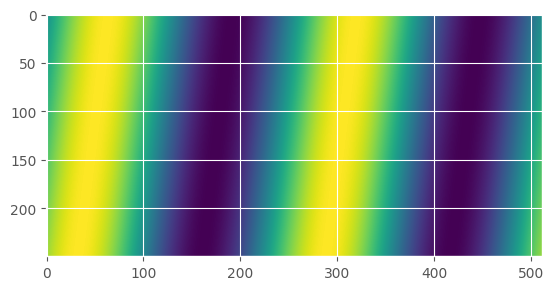

In [4]:
from source.hooks import ImageHook

def imageProcessFunction(self,image,metadata,**kwargs):
    print(self)
    print(metadata)
    print(image.shape)
    image = image[:250,:]
    metadata['Height'], metadata['Width'] = image.shape
    return image, metadata

hooks=HookSet()
hooks.hookImageProcess=ImageHook(function=imageProcessFunction)

apdSystem = APDSystem(configFileName='myConfig.cfg', rootDataFolder='') #local
lib = AcquisitionPluginLibrary()
positions=[[0,0],[1,0],[0,1]] 
acquisition = lib.xySequence(positions)
acquisition.hooks=hooks
acquisition.settings.show_display=False
dataset=apdSystem.acquire(acquisition)

print(f'Aquisition was completed and saved at {dataset.path}')
viewAcquisition(dataset)